## Lec46 Homophily : Introduction to Fatman Evolutionary Model

1. Homophily
2. Closures
3. Social Influence
<img src = "lec46_1.png">
<img src = "lec46_2.png">

## Lec47 Homophily : Fatman Evolutionary Model - Base code (Adding People)

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd

def create_graph():
    G = nx.Graph()
    #G.add_nodes_from(range(1, 101))
    for i in range(1, 101):
        G.add_node(i)
    return G

def visualize(G, labeldict, nsize, color_array):
    nx.draw(G, labels = labeldict, with_labels=1, node_size = nsize, node_color = color_array)
    #nx.draw(G, with_labels=1, node_size = nsize)
    plt.show() 
G = create_graph()

#visualize(G)



{1: 37, 2: 29, 3: 34, 4: 18, 5: 31, 6: 16, 7: 27, 8: 26, 9: 21, 10: 35, 11: 35, 12: 23, 13: 23, 14: 37, 15: 31, 16: 33, 17: 25, 18: 39, 19: 30, 20: 25, 21: 16, 22: 28, 23: 31, 24: 24, 25: 40, 26: 37, 27: 19, 28: 38, 29: 28, 30: 40, 31: 38, 32: 39, 33: 32, 34: 24, 35: 21, 36: 23, 37: 17, 38: 22, 39: 37, 40: 21, 41: 24, 42: 20, 43: 16, 44: 29, 45: 28, 46: 38, 47: 32, 48: 15, 49: 39, 50: 21, 51: 28, 52: 20, 53: 30, 54: 40, 55: 19, 56: 31, 57: 23, 58: 23, 59: 36, 60: 24, 61: 36, 62: 28, 63: 26, 64: 17, 65: 34, 66: 31, 67: 31, 68: 23, 69: 26, 70: 30, 71: 19, 72: 19, 73: 20, 74: 26, 75: 28, 76: 37, 77: 20, 78: 40, 79: 36, 80: 21, 81: 16, 82: 24, 83: 30, 84: 18, 85: 21, 86: 20, 87: 21, 88: 16, 89: 16, 90: 38, 91: 29, 92: 37, 93: 37, 94: 27, 95: 29, 96: 30, 97: 30, 98: 23, 99: 40, 100: 25, 101: 'gym', 102: 'eat_out', 103: 'movie_club', 104: 'karate_club', 105: 'yoga_club'}


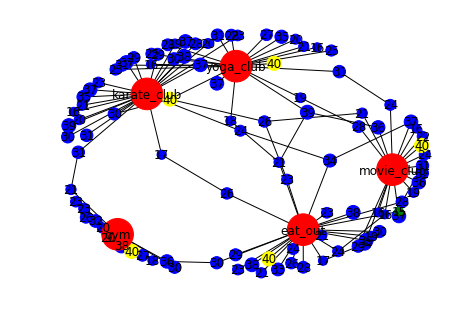

In [28]:
#Assigning BMI 
def assign_bmi(G):
    for each in G.nodes():
        G.node[each]['name'] = rd.randint(15, 40)
        G.node[each]['type'] = 'person'
        
        
def get_labels(G):
    dict1 = {}
    for each in G.nodes():
        dict1[each] = G.node[each]['name']
    return dict1

def get_size(G):
    l1 = []
    for each in G.nodes():
        if G.node[each]['type'] == 'person':
            l1.append(G.node[each]['name'] *5)#Scaling for beautiful G
        else:
            l1.append(1000)
    return l1

def add_foci_nodes(G):
    n = G.number_of_nodes()
    i = n + 1
    foci_nodes = ['gym', 'eat_out', 'movie_club', 'karate_club', 'yoga_club']
    for j in range(5):
        G.add_node(i)
        G.node[i]['name'] = foci_nodes[j]
        G.node[i]['type'] = 'foci'
        i = i+1
        
def get_colors(G):
    c = []
    for each in G.nodes():
        if G.node[each]['type'] == 'person':
            if G.node[each]['name'] == 15:
                c.append('green')
            elif G.node[each]['name'] == 40:
                c.append('yellow')
            else:
                c.append('blue')
        else: 
            c.append('red')
    return c

def get_foci_nodes():
    f = []
    for each in G.nodes():
        if G.node[each]['type'] == 'foci':
            f.append(each)
    return f

def get_persons_nodes():
    p = []
    for each in G.nodes():
        if G.node[each]['type'] == 'person':
            p.append(each)
    return p

def add_foci_edges():
    foci_nodes = get_foci_nodes()
    person_nodes = get_persons_nodes()
    for each in person_nodes:
        r = rd.choice(foci_nodes)
        G.add_edge(each, r)
        
def homophily(G):
    p_nodes = get_persons_nodes()
    for u in p_nodes:
        for v in p_nodes:
            if u != v:
                diff = abs(G.node[u]['name'] - G.node[v]['name'])
                p = float(1) / (diff+500) # decrease the value to make more inter connections
                r = rd.uniform(0, 1)
                if r < p:
                     G.add_edge(u, v)
        
G = create_graph()
assign_bmi(G)   
add_foci_nodes(G)
add_foci_edges()
homophily(G)

label_dict = get_labels(G)
print label_dict
node_size = get_size(G)
color_array = get_colors(G)

visualize(G, label_dict, node_size, color_array)

## Lec47 Homophily : Fatman Evolutionary Model - Base code (Adding Social Foci)

In [5]:
def add_foci_nodes(G):
    n = G.number_of_nodes()
    i = n + 1
    foci_nodes = ['gym', 'eat_out', 'movie_club', 'karate_club', 'yoga_club']
    for j in range(5):
        G.add_node(i)
        G.node[i]['name'] = foci_nodes[j]
        G.node[i]['type'] = 'foci'
        i = i+1
        
        
add_foci_nodes(G)

In [30]:
def get_colors(G):
    c = []
    for each in G.nodes():
        if G.node[each]['type'] == 'person':
            c.append('blue')
        else:
            c.append('red')
    return c

In [32]:
def get_foci_nodes():
    f = []
    for each in G.nodes()
        if G.node[each]['type'] == 'foci':
            f.append(each)
    return f

def get_persons_nodes():
    p = []
    for each in G.nodes():
        if G.node[each]['type'] == 'person':
            p.append(each)
    return p

def add_foci_edges():
    foci_nodes = get_foci_nodes()
    person_nodes = get_persons_nodes()
    for each in person_nodes:
        r = random.choice(foci_nodes)
        G.add_edge(each, r)

SyntaxError: invalid syntax (<ipython-input-32-62efd0d08a8c>, line 3)

## Lec49 Homophily : Fatman Evolutionary Model - Implementing Homophily

* P(edge between two people) is inversely proportional to the absolute difference between their BMIs
* Divide the probabilty by 1000
-> Avoid infinity issue
-> Reduce the probabilty which reduces the edges

In [ ]:
def homophily(G):
    p_nodes = get_persons_nodes()
    for u in p_nodes:
        for v in p_nodes:
            if u != v:
                diff = abs(G.node[u]['name'], G.node[v]['name'])
                p = float(1) / diff*1000
                r = rd.uniform(0, 1)
                if r < p:
                     G.add_edge(u, v)